



# **INTRODUCTION**



Le projet a vocation à vous faire travailler le design d’algorithme, leur implémentation et l’utilisation
d’outil de gestion de code informatique.
Ce sujet vous propose d’explorer et analyser des données issues d’une campagne de mesure au sein
d’un bâtiment de bureau. Les données sont proposées par Kandu et sont composées entre autres de
la mesure de la température ambiante (°C), de l’humidité relative (%), du niveau sonore (dBA), du
niveau lumineux (lux), de la quantité de CO2 (ppm). 


---


❖ Trouvez- vous des anomalies dans les données, que pouvez-vous en conclure ? Proposez et
implémentez un algorithme permettant de **relever** les anomalies automatiquement et de les
**montrer** sur les courbes.

> Bonus : Trouvez automatiquement les périodes horaires d’occupations des bureaux



In [ ]:
from numpy import *
from matplotlib import *
import pandas as pd
import csv
import matplotlib.pyplot as plt 
from datetime import datetime



# **Algorithme**


In [ ]:
from google.colab import files
data_to_load = files.upload()


Saving EIVP_KM.csv to EIVP_KM (1).csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(data_to_load['EIVP_KM.csv']))

In [ ]:
 data = pd.read_csv(open('EIVP_KM.csv'),sep = ';')
 print (data)

      id  noise  temp  humidity  lum  co2                    sent_at
0      1   35.5  25.8      55.0  282  448  2020-09-11 17:48:06 +0200
1      1   44.5  25.5      55.0  288  429  2020-09-11 18:03:03 +0200
2      1   34.5  25.5      55.0  286  417  2020-09-11 18:18:03 +0200
3      1   37.5  25.5      54.5  282  433  2020-09-11 18:33:03 +0200
4      1   36.0  25.3      55.0  274  403  2020-09-11 18:48:03 +0200
...   ..    ...   ...       ...  ...  ...                        ...
7875   6   41.0  21.3      44.5  728  479  2019-08-25 10:45:51 +0200
7876   6   41.0  21.3      44.0  270  482  2019-08-25 11:00:52 +0200
7877   6   42.0  21.3      44.0  302  475  2019-08-25 11:15:52 +0200
7878   6   39.5  21.3      43.5  336  478  2019-08-25 11:30:54 +0200
7879   6   38.5  21.3      43.5  366  459  2019-08-25 11:45:54 +0200

[7880 rows x 7 columns]


In [ ]:
#On trie le tableau suivant l'orde chronologique:
fexcel=pd.read_csv('EIVP_KM.csv',sep=';',engine='python')
date_tableau=fexcel['sent_at'].tolist()
print(date_tableau)
trie_date=[]
for i in range(len(date_tableau)):
    trie_date.append(datetime.strptime(date_tableau[i],'%Y-%m-%d %H:%M:%S %z'))
trie_date.sort()
print(trie_date)
data["sent_at"]=trie_date
print(data)

['2020-09-11 17:48:06 +0200', '2020-09-11 18:03:03 +0200', '2020-09-11 18:18:03 +0200', '2020-09-11 18:33:03 +0200', '2020-09-11 18:48:03 +0200', '2020-09-11 19:03:03 +0200', '2020-09-11 19:18:03 +0200', '2020-09-11 19:33:03 +0200', '2020-09-11 19:48:02 +0200', '2020-09-11 20:03:06 +0200', '2020-09-11 20:18:09 +0200', '2020-09-11 20:33:03 +0200', '2020-09-11 20:48:03 +0200', '2020-09-11 21:03:02 +0200', '2020-09-11 21:18:03 +0200', '2020-09-11 21:33:03 +0200', '2020-09-11 21:48:03 +0200', '2020-09-11 22:03:02 +0200', '2020-09-11 22:18:02 +0200', '2020-09-11 22:33:02 +0200', '2020-09-11 22:48:02 +0200', '2020-09-11 23:03:02 +0200', '2020-09-11 23:18:02 +0200', '2020-09-11 23:33:02 +0200', '2020-09-11 23:48:02 +0200', '2020-09-12 00:03:02 +0200', '2020-09-12 00:18:02 +0200', '2020-09-12 00:33:02 +0200', '2020-09-12 00:48:01 +0200', '2020-09-12 01:03:02 +0200', '2020-09-12 01:18:02 +0200', '2020-09-12 01:33:01 +0200', '2020-09-12 01:48:02 +0200', '2020-09-12 02:03:02 +0200', '2020-09-12 0

In [ ]:
df = pd.DataFrame(data)
mean_df = df.mean()
print(mean_df)

id            3.468528
noise        32.508185
temp         24.853071
humidity     54.340292
lum         164.291371
co2         449.255330
dtype: float64


In [ ]:
df = pd.DataFrame(data)
stat_df = df.describe()
print(stat_df)


                id        noise  ...          lum          co2
count  7880.000000  7880.000000  ...  7880.000000  7880.000000
mean      3.468528    32.508185  ...   164.291371   449.255330
std       1.711084     8.648065  ...   202.650402    41.691629
min       1.000000    27.000000  ...     0.000000   343.000000
25%       2.000000    27.000000  ...     0.000000   417.000000
50%       3.000000    27.000000  ...    84.000000   444.000000
75%       5.000000    36.500000  ...   284.000000   470.000000
max       6.000000    67.000000  ...  1418.000000   705.000000

[8 rows x 6 columns]


Text(0.5, 1.0, 'Histogramme noise')

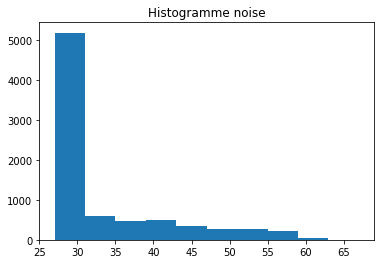

In [ ]:
#affiche l'histogramme d'une colonne
plt.hist(data.noise)
plt.title("Histogramme noise")


Text(0.5, 1.0, 'Histogramme temp')

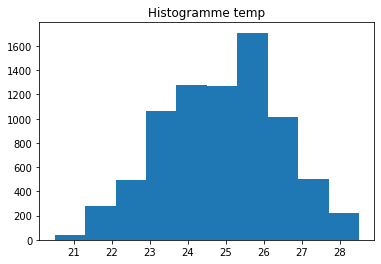

In [ ]:
plt.hist(data.temp)
plt.title("Histogramme temp")

Text(0.5, 1.0, 'Histogramme lum')

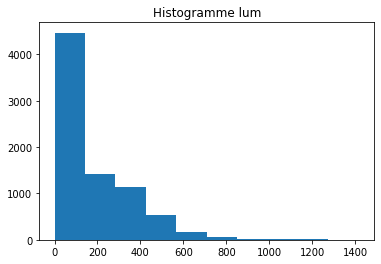

In [ ]:
plt.hist(data.lum)
plt.title("Histogramme lum")

Text(0.5, 1.0, 'histogramme humidity')

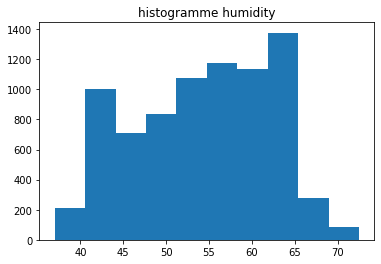

In [ ]:
plt.hist(data.humidity)
plt.title("histogramme humidity")

(array([  10., 1833., 2559., 2288.,  718.,  335.,   92.,   26.,   12.,
           7.]),
 array([343. , 379.2, 415.4, 451.6, 487.8, 524. , 560.2, 596.4, 632.6,
        668.8, 705. ]),
 <a list of 10 Patch objects>)

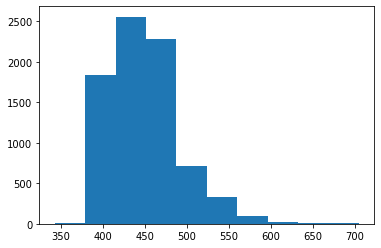

In [ ]:
plt.hist(data.co2)

In [ ]:
#Détection des anomalies - problème lors de la double boucle

def f_anomalie(data, mean_df,precision):
  anomalie=[]
  for x in range(len(data)):
    for i in range(len(data[x])):
      if data[i]> df.mean([i])+ precision*df.mean([i]):
        anomalie.append(data[i])
  return (anomalie)

print(f_anomalie(data,mean_df,1))


In [ ]:
def horaire(data):
  for i in df.itertuples() :
    if data.iloc[i][5]==0:
      debut=data[sent_at, i]
    elif data.iloc[i][5]!=0 :
      fin=data[sent_at,i]
  return(debut,fin)

print(horaire(data))


TypeError: ignored

In [ ]:
def horaire2(data):
  for col in data :
    if col=="lum":
      continue
      for i in df.itertuples():
        if data.iloc[i][col]==0:
          debut=data[sent_at, i]
        elif data.iloc[i][col]!=0 :
          fin=data[sent_at,i]
      return(debut,fin)

print(horaire2(data))

None


In [ ]:
#Détection des anomalies pour la colonne "noise"
colonne_noise=data["noise"]
print(colonne_noise)
anomalie_noise=[]
for i in range(len(colonne_noise)):
  if colonne_noise[i]>1.8*mean_df["noise"]:
    anomalie_noise.append(colonne_noise[i])

print(anomalie_noise)
len(anomalie_noise)





0       35.5
1       44.5
2       34.5
3       37.5
4       36.0
        ... 
7875    41.0
7876    41.0
7877    42.0
7878    39.5
7879    38.5
Name: noise, Length: 7880, dtype: float64
[59.5, 59.0, 59.0, 59.5, 59.5, 61.0, 61.5, 64.0, 59.0, 60.0, 60.0, 61.0, 61.0, 59.0, 60.0, 59.0, 61.5, 59.5, 59.5, 62.0, 63.5, 59.0, 61.0, 61.5, 60.5, 60.5, 59.5, 62.5, 61.0, 61.0, 59.0, 61.5, 59.0, 59.0, 60.0, 59.0, 60.5, 61.5, 59.0, 61.5, 59.5, 61.0, 59.5, 62.0, 60.0, 61.0, 59.0, 59.0, 60.5, 59.5, 59.5, 62.0, 63.0, 59.0, 63.0, 59.0, 67.0]


57

<Figure size 432x288 with 0 Axes>

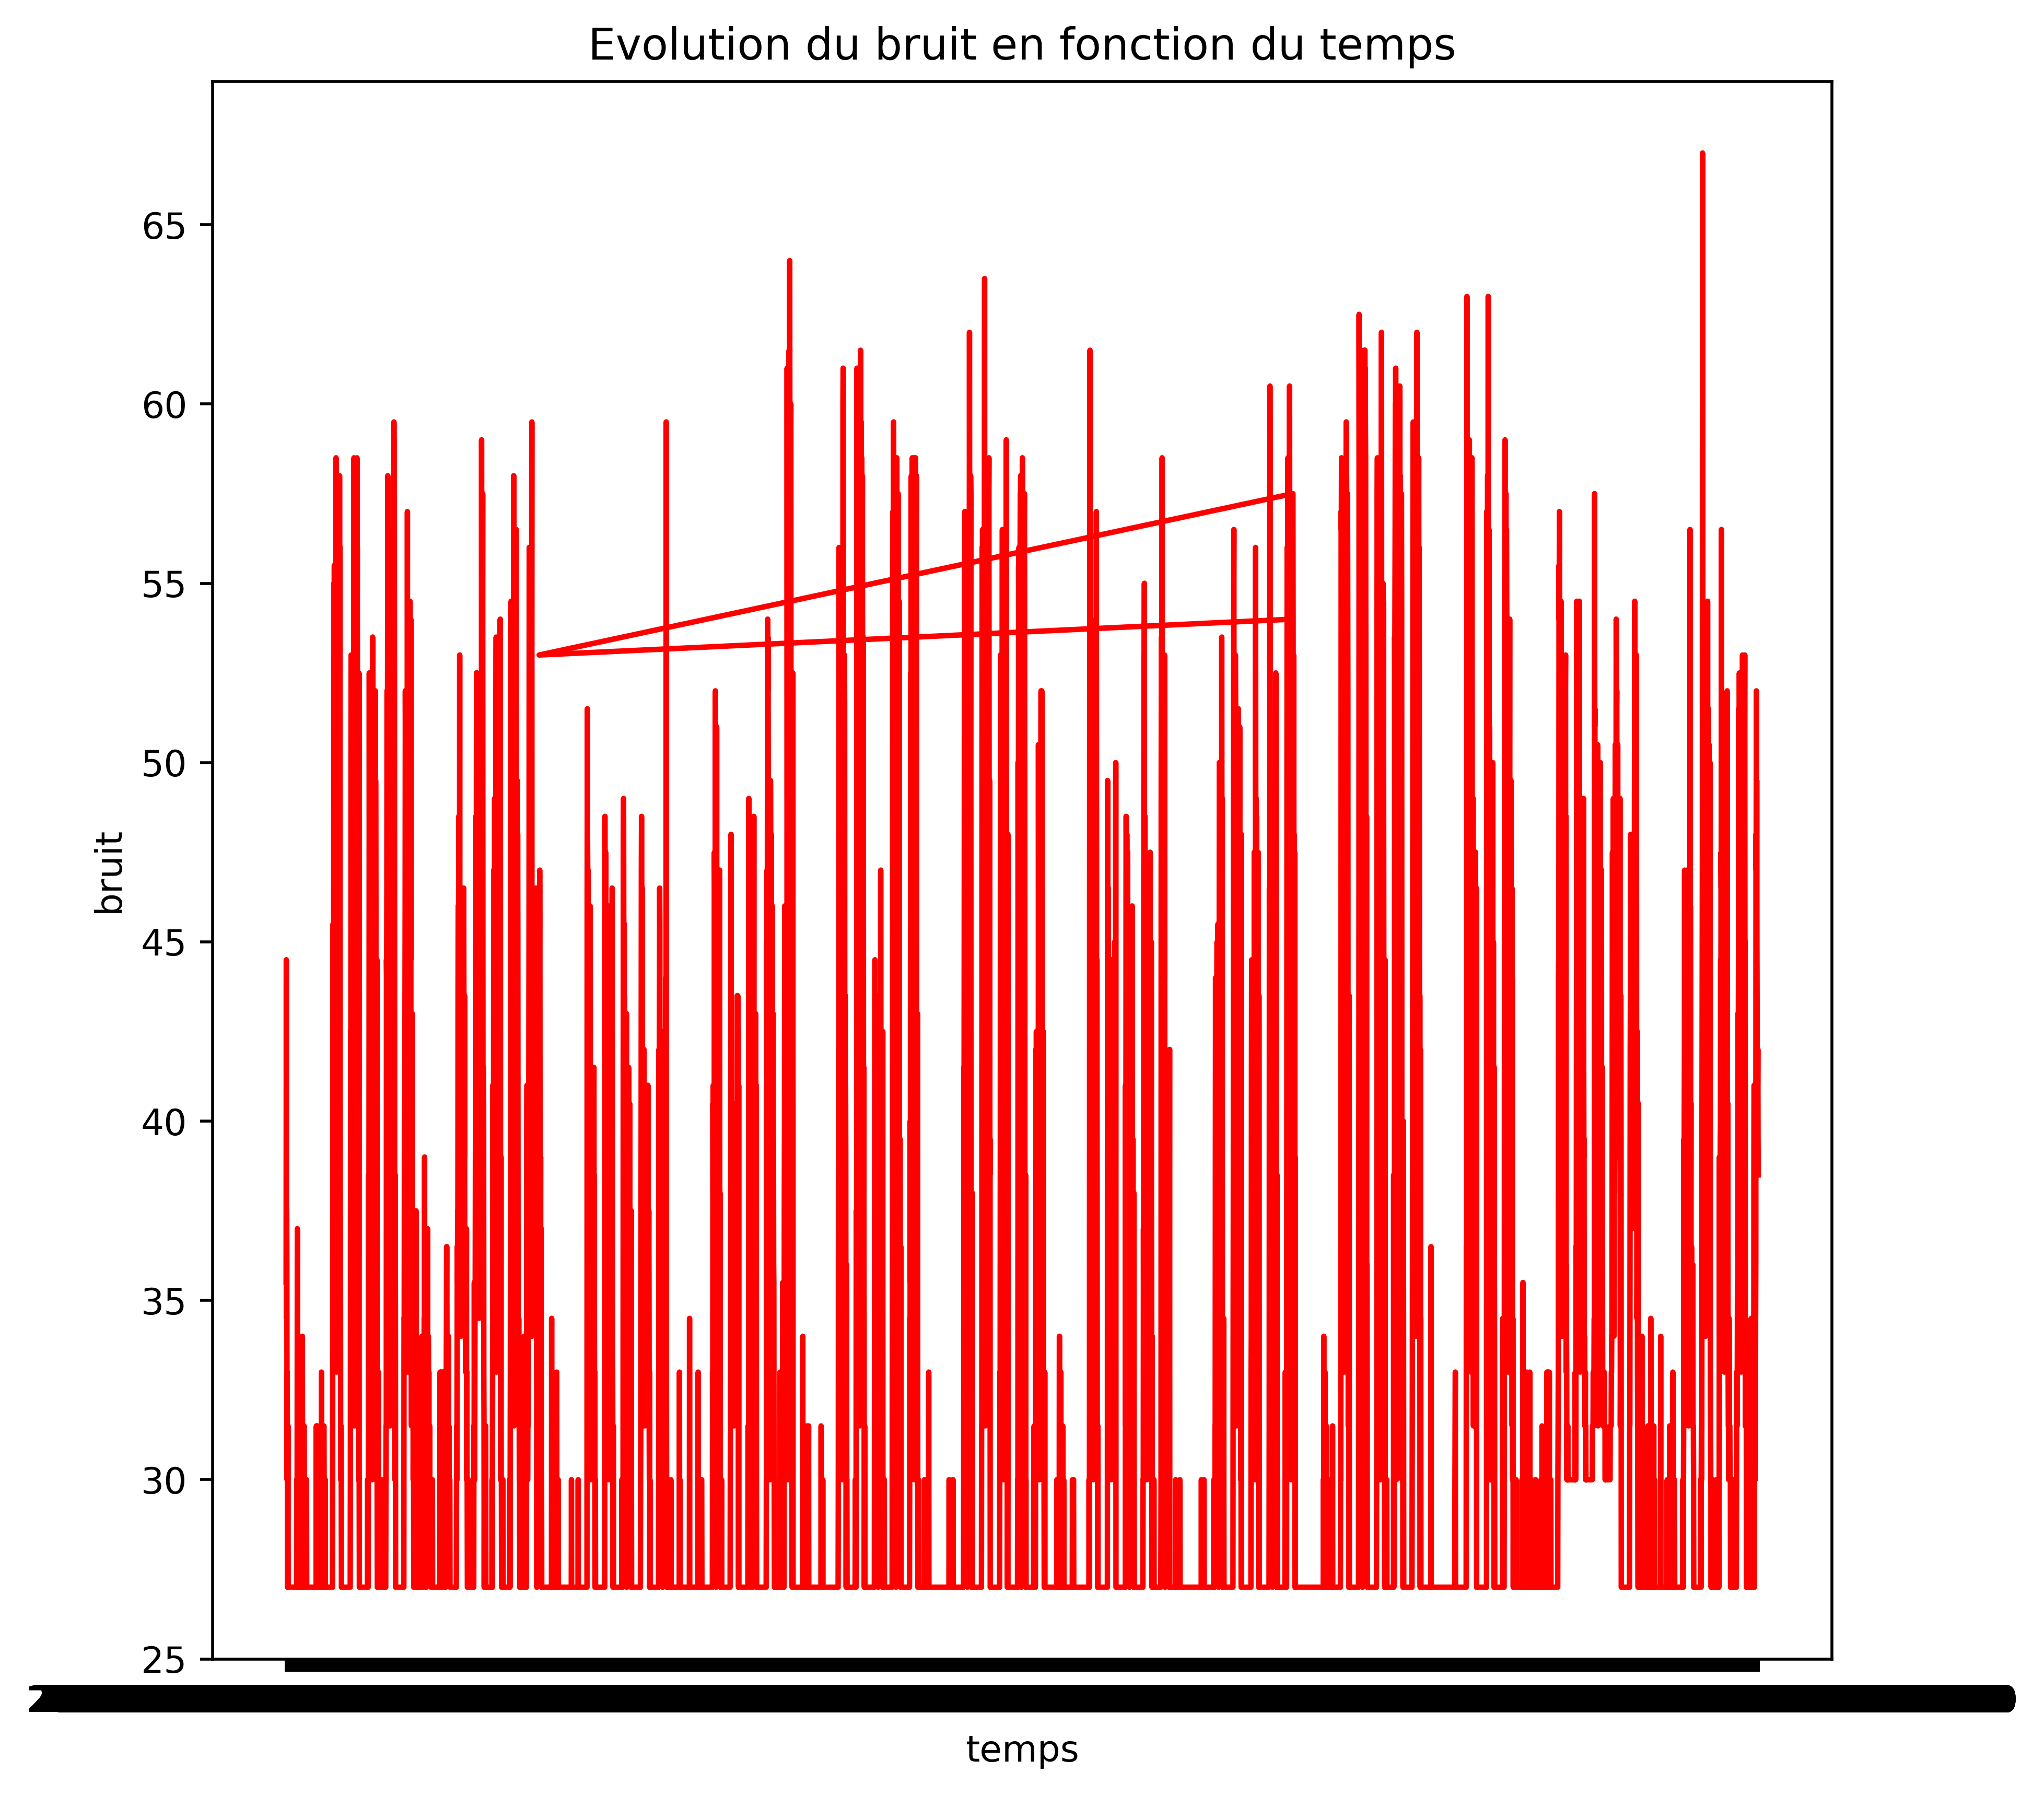

<Figure size 432x288 with 0 Axes>

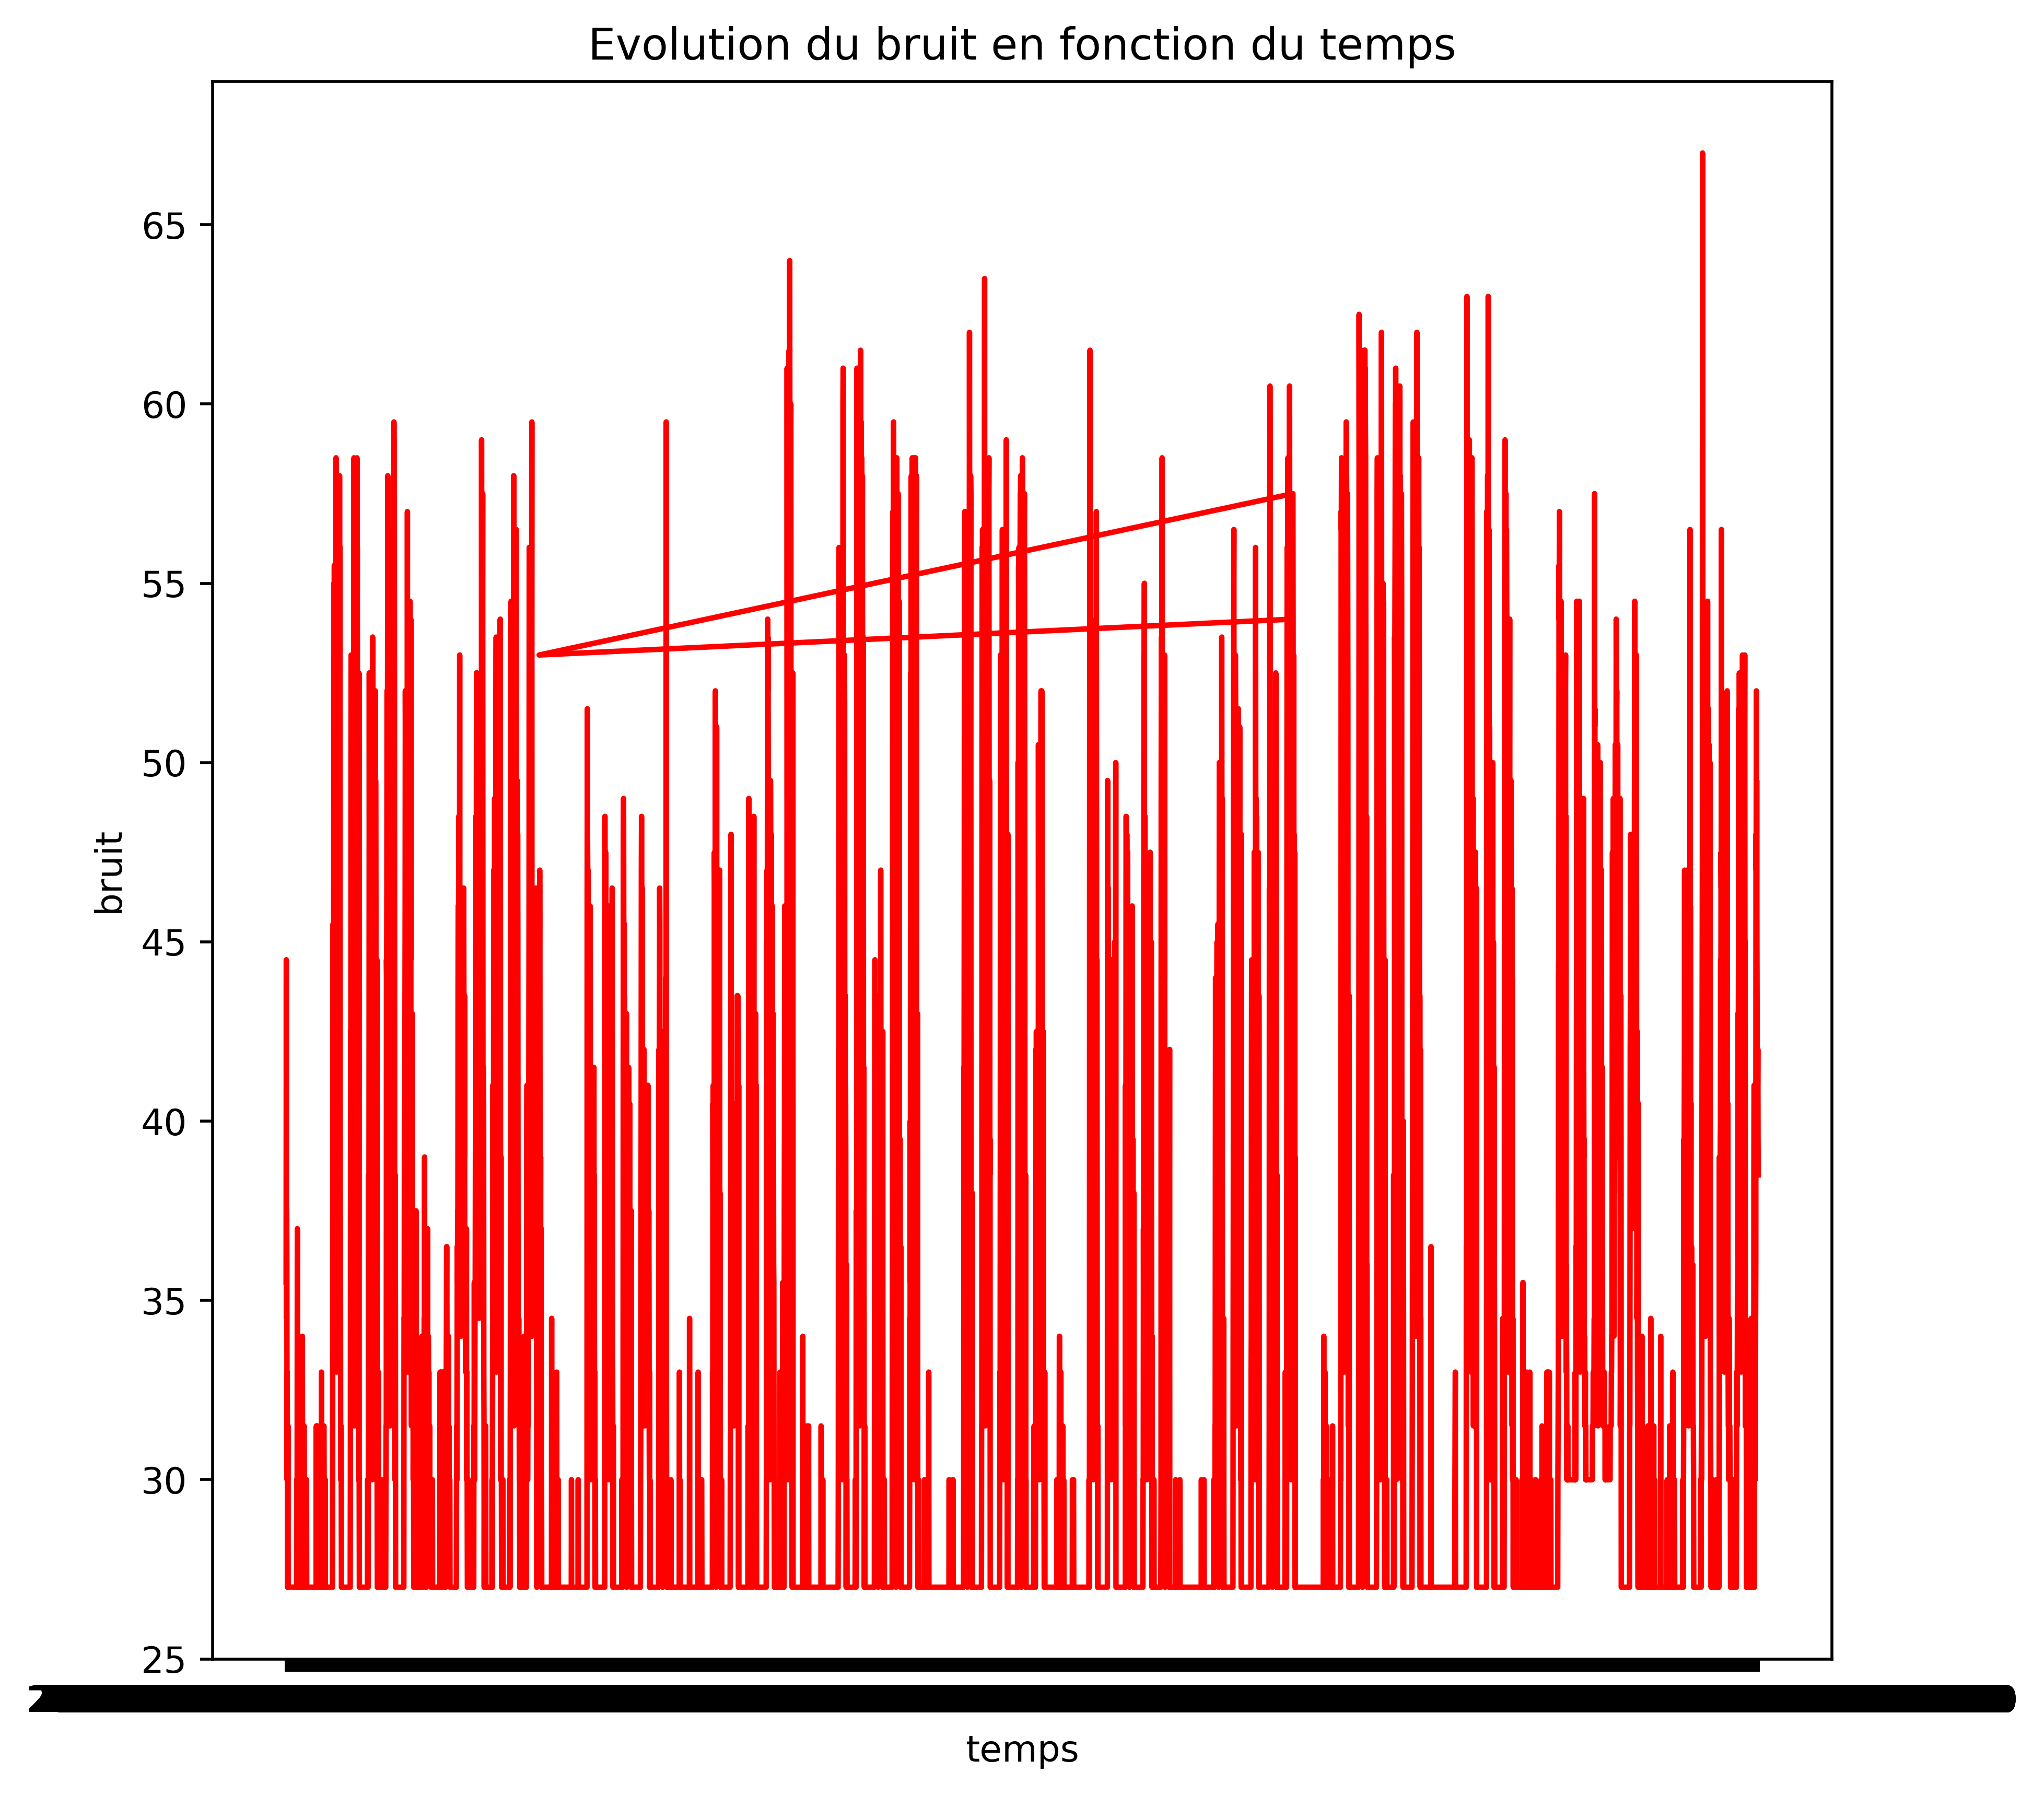

In [ ]:
plt.figure(0)
plt.figure(figsize=(8,8), dpi=500)
plt.plot(data["sent_at"],data["noise"], 'r')
plt.title('Evolution du bruit en fonction du temps')
plt.xlabel('temps')
plt.ylabel('bruit')
plt.show(0)

In [ ]:
#Afficher des courbes montrant l’évolution d’une variable en fonction du temps
x=df['sent_at']
y=df['temp']
plt.plot(x,y)
plt.title('Evolution de la température en fonction du temps')
plt.xlabel('temps')
plt.ylabel('temperature')
plt.show()

In [ ]:
#affichage des valeurs statistiques sur la courbe précédente
x=df['sent_at']
y=df['temp']
plt.title('Evolution de la température en fonction du temps')
plt.xlabel('temps')
plt.ylabel('temperature')
plt.text(2,20.5,'min=20,5',fontweight='bold')
plt.text(2, 28,'max=28,5',fontweight='bold')
plt.text(20, 24,'moyenne=24,8',fontweight='bold')
plt.plot(x,y,'orange')
plt.show()

In [ ]:
x=df['sent_at']
y1=df['temp']
y2=df['humidity']
plt.plot(x,y1,label="température")
plt.plot(x,y2,label="humidité")
plt.legend()
plt.show()

In [ ]:
#calcul de l'indice humidex
humidex=[]
colonne_temp=data["temp"]
colonne_humidity=data["humidity"]
L=len(data)

for i in range(L):
  h= colonne_temp[i] + (5/9)*(6.112*(colonne_humidity[i]/100)*10**(7.5*(colonne_temp[i]/(237.7+colonne_temp[i])))-10)
  humidex.append(h)

x=humidex
y=df["sent_at"]
plt.plot(y,x)
plt.show()